# Basis Functions

## Machine Learning and Adaptive Intelligence

### Mauricio Álvarez 

### Based on slides by Neil D. Lawrence


In [2]:
# You need to have mlai.py, teaching_plots.py and gp_tutorial.py in the same folder than this notebook. 
# You might also need to install GPy using pip install --upgrade GPy
import pods
import mlai
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import teaching_plots as plot
%matplotlib inline

### Review
- Last time: explored least squares for univariate and multivariate regression.
- Introduced matrices, linear algebra and derivatives.
- This time: introduce *basis functions* for non-linear regression models.

### Nonlinear Regression

-   Problem with Linear Regression: $\mathbf{x}$ may not be linearly related to $\mathbf{y}$.

-   Potential solution: create a feature space: define $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=0}^m w_j \phi_j(\mathbf{x})$$

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\boldsymbol{\phi} = [1, x, x^2]$$

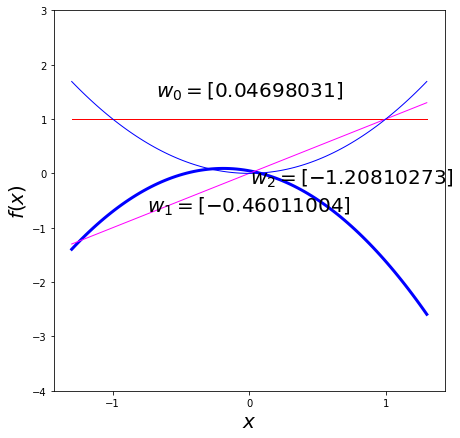

In [3]:
f, ax = plt.subplots(figsize=(7, 7))
import os

loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = x$',
       '$\phi(x) = x^2$']
mlai.plot_basis(mlai.polynomial, x_min=-1.3, x_max=1.3, fig=f, ax=ax, loc=loc, text=text)    


In [4]:
from ipywidgets import *
def display_plots(filebase, directory=None, width=700, height=500, **kwargs):
    """Display a series of plots controlled by sliders. The function relies on Python string format functionality to index through a series of plots."""
    def show_figure(filebase, directory, **kwargs):
        """Helper function to load in the relevant plot for display."""
        filename = filebase.format(**kwargs)
        if directory is not None:
            filename = directory + '/' + filename           
        display(HTML("<img src='{filename}'>".format(filename=filename)))
        
    interact(show_figure, filebase=fixed(filebase), directory=fixed(directory), **kwargs)

In [5]:
display_plots('polynomial_basis{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1,3))

interactive(children=(IntSlider(value=2, description='num_basis', max=3, min=1), Output()), _dom_classes=('wid…

### Functions Derived from Quadratic Basis

\begin{align}
    f(x) &= {\color{\redColor}w_0}\phi_0(x) + {\color{\magentaColor}w_1 \phi_1(x)} + {\color{\blueColor}w_2          
                                                                                 \phi_2(x)}\\
         &= {\color{\redColor}w_0} \quad\;\;\;\,+ {\color{\magentaColor}w_1x} \quad\;\,+ {\color{\blueColor}w_2 x^2}
\end{align}

In [6]:
display_plots('polynomial_function{func_num:0>3}.svg', directory='./diagrams', func_num=(1,3))

interactive(children=(IntSlider(value=2, description='func_num', max=3, min=1), Output()), _dom_classes=('widg…

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis

    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{2\ell^2}\right)$$


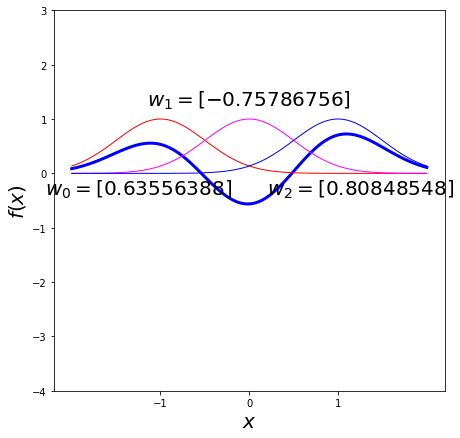

In [7]:
f, ax = plt.subplots(figsize=(7, 7))

loc = [[-1.25, -0.4],
       [0., 1.25],
       [1.25, -0.4]]
text = ['$\phi_1(x) = e^{-2(x + 1)^2}$',
        '$\phi_2(x) = e^{-2x^2}$', 
        '$\phi_3(x) = e^{-2(x-1)^2}$']
mlai.plot_basis(mlai.radial, x_min=-2, x_max=2, fig=f, ax=ax, loc=loc, text=text)   

In [8]:
display_plots('radial_basis{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1, 3))

interactive(children=(IntSlider(value=2, description='num_basis', max=3, min=1), Output()), _dom_classes=('wid…

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_0 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_1e^{-2x^2}} + {\color{\blueColor}w_2 e^{-2(x-1)^2}}$$

In [9]:
display_plots('radial_function{func_num:0>3}.svg', directory='./diagrams', func_num=(1,3))

interactive(children=(IntSlider(value=2, description='func_num', max=3, min=1), Output()), _dom_classes=('widg…

### Basis Function Models

-   The *prediction function* is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=0}^m w_j \phi_{i, j},$$

where we have used $\phi_{i, j} = \phi_{j}(\mathbf{x}_i)$.

## Vector Notation

-   Write in vector notation,
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}_i$$
    
-   This is, we joint the scalar functions $\phi_{ij}$ into a vector $\boldsymbol{\phi}_i$

\begin{align*}
    \boldsymbol{\phi}_i =
                \begin{bmatrix}
                    \phi_0(\mathbf{x}_i)\\
                    \phi_1(\mathbf{x}_i)\\
                    \vdots\\
                    \phi_m(\mathbf{x}_i)
                \end{bmatrix}.
\end{align*}

### Log Likelihood for Basis Function Model

-   The likelihood of a single data point is
    $$p\left(y_i|\mathbf{x}_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}\right).$$
       
-   Using the i.i.d. assumption on the whole dataset
\begin{align*}
   p(\mathbf{y}|\mathbf{X})&= \prod_{i=1}^n p(y_i|\mathbf{x}_i)\\
   p(\mathbf{y}|\mathbf{X})&= \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-  
                              \frac{\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}\right)\\
   p(\mathbf{y}|\mathbf{X})&= \frac{1}{\left(2\pi \sigma^2\right)^{\frac{n}{2}}}\exp\left(-
                               \frac{\sum_{i=1}^n\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}} 
                                      {2\sigma^2}\right).
 \end{align*}

### Log Likelihood for Basis Function Model

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

 

### Objective Function

- And a corresponding *objective function* of the form
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

### Expand the Brackets

\begin{align}
  E(\mathbf{w},\sigma^2) =  &\frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}
                                {\sigma^2}\sum _{i=1}^{n}y_i\mathbf{w}^{\top}\boldsymbol{\phi}_i\\ 
                           &+\frac{1}{2\sigma^2}\sum_{i=1}^{n}
                           \mathbf{w}^{\top}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\mathbf{w}.                   
\end{align}
 

 ### Expand the Brackets
 $$ \begin{align} E(\mathbf{w}, \sigma^2) = & \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}
  \mathbf{w}^\top\sum_{i=1}^{n}\boldsymbol{\phi}_i y_i\\ & +\frac{1}{2\sigma^2} \mathbf{w}^{\top}\left[\sum
    _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]\mathbf{w}.\end{align}$$

### Multivariate Derivatives Reminder

-   We will need some multivariate calculus.
    $$\frac{\text{d}\mathbf{a}^{\top}\mathbf{w}}{\text{d}\mathbf{w}}=\frac{\text{d}\mathbf{w}^{\top}\mathbf{a}}{\text{d}\mathbf{w}}=\mathbf{a}$$
    and
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=\left(\mathbf{A}+\mathbf{A}^{\top}\right)\mathbf{w}$$
    or if $\mathbf{A}$ is symmetric (*i.e.*
    $\mathbf{A}=\mathbf{A}^{\top}$)
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=2\mathbf{A}\mathbf{w}.$$

### Differentiate

Differentiating with respect to the vector $\mathbf{w}$ we obtain
$$\frac{\text{d} E\left(\mathbf{w},\sigma^2 \right)}{\text{d} \mathbf{w}}=-\frac{1}{\sigma^2} \sum _{i=1}^{n}\boldsymbol{\phi}_iy_i+\frac{1}{\sigma^2} \left[\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]\mathbf{w}$$
Leading to
$$\mathbf{w}^{*}=\left[\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]^{-1}\sum _{i=1}^{n}\boldsymbol{\phi}_iy_i,$$

### Matrix Notation

Rewrite in matrix notation:
$$\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^\top = \boldsymbol{\Phi}^\top \boldsymbol{\Phi}$$
$$\sum _{i=1}^{n}\boldsymbol{\phi}_iy_i = \boldsymbol{\Phi}^\top \mathbf{y}$$

### $\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^\top=\boldsymbol{\Phi}^{\top}\boldsymbol{\Phi}$

Let us write 

\begin{align*}
    \boldsymbol{\Phi} =
                \begin{bmatrix}
                    \boldsymbol{\phi}^{\top}_1\\
                    \boldsymbol{\phi}^{\top}_2\\
                    \vdots\\
                    \boldsymbol{\phi}^{\top}_n
                \end{bmatrix},
     \quad
     \boldsymbol{\Phi}^{\top} =
                \begin{bmatrix}
                    \boldsymbol{\phi}_1\; \boldsymbol{\phi}_2\; \cdots \; \boldsymbol{\phi}_n\\               
                \end{bmatrix}.
\end{align*}

We can then say that

\begin{align*}
    \boldsymbol{\Phi}^{\top}\boldsymbol{\Phi} =
                \begin{bmatrix}
                    \boldsymbol{\phi}_1\; \boldsymbol{\phi}_2\; \cdots \; \boldsymbol{\phi}_n\\               
                \end{bmatrix} 
                \begin{bmatrix}
                    \boldsymbol{\phi}^{\top}_1\\
                    \boldsymbol{\phi}^{\top}_2\\
                    \vdots\\
                    \boldsymbol{\phi}^{\top}_n
                \end{bmatrix} =    
\boldsymbol{\phi}_1\boldsymbol{\phi}^{\top}_1+\boldsymbol{\phi}_2\mathbf{x}^{\top}_2+\cdots+\boldsymbol{\phi}_n
                \boldsymbol{\phi}^{\top}_n = \sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^\top.
\end{align*}

### Update Equations

-   Update for $\mathbf{w}^{*}$.
    $$\mathbf{w}^{*} = \left(\boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y}$$


-   The solution for $\mathbf{w}^{*}$ exists if we can compute $\left(\boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right)^{-1}$. The inverse can be computed as long as $\boldsymbol{\Phi}^\top \boldsymbol{\Phi}$ is non-singular (e.g. determinat different from zero, or has full-rank).


-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\boldsymbol{\phi}_i\right)^{2}}{n}.$$

### Avoid Direct Inverse

- E.g. Solve for $\mathbf{w}$
  $$\left(\boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right)\mathbf{w} = \boldsymbol{\Phi}^\top \mathbf{y}$$
  
- See `np.linalg.solve`

- In practice use $\mathbf{Q}\mathbf{R}$ decomposition (see lab class notes).

### Polynomial Fits to Olympic Data

In [ ]:
basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
#f, ax = plt.subplots(1, 2, figsize=(10,5))
f, ax = plt.subplots(figsize=(10,5))
x = data['X']
y = data['Y']

data_limits = [1892, 2020]
max_basis = 10

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))

for num_basis in range(1,max_basis):
    model = mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    sum_squares[num_basis-1] = model.objective() 
    ll[num_basis-1] = model.log_likelihood()   
    plot.marathon_fit_s4(model=model, value = num_basis, param_name='', param_range=(1, max_basis+1), 
                      xlim= data_limits, objective_ylim=[0,8],
                      title='Root Mean Square Training Error',
                      fig=f, ax=ax)
    


In [ ]:
display_plots('olympic_LM_polynomial_{num_basis:0>3}.svg', directory='./diagrams', num_basis=(1, max_basis-1))

#### Reading

- Section 1.4 of Rogers and Girolami (2016).
- Chapter 1, pg 1-6 of Bishop (2006).
- Chapter 3, Section 3.1 of Bishop (2006) up to pg 143.

 